# Basics of Keras in Tensorflow

In [30]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

* The data is custom made for a hypotethical clinical new drug test in 2100 individuals which consists a group of people who are younger than 65 years of age and another group with equal number of people who are 65 years of age or older.
* Around 95% of patients who are 65 and older exprienced side effects.
* Around 95% of pateints who are under 65 years of age experienced no side effects.


In [31]:
X = [] # input data
Y = [] # label

In [32]:
# Creating the outliers
total_patients = 2100
no_of_outliers = int(5 / 100 * total_patients / 2)
for i in range(no_of_outliers):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(1)

In [33]:
# Rest of patients apart from outliers
no_of_non_outliers = 2100 - no_of_outliers
for i in range(no_of_non_outliers):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(1)

In [34]:
# Converting the lists to np arrays.
X = np.array(X)
Y = np.array(Y)
X, Y = shuffle(X, Y)

In [35]:
X_test = []
Y_test = []

for i in range(no_of_outliers):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(1)

for i in range(200):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(1)

In [36]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test, Y_test = shuffle(X_test, Y_test)

In [37]:
scaler = MinMaxScaler(feature_range = (0, 1))
# data should not be 1D for fit_transfor
scaled_X = scaler.fit_transform(X.reshape(-1, 1))
scaled_X_test = scaler.fit_transform(X_test.reshape(-1, 1))

### Simple tf.keras Sequnetial Model

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [39]:
physical_devices = tf.config.experimental.list_logical_devices('GPU')
print("No Of GPUs = ", len(physical_devices))
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

No Of GPUs =  0


In [40]:
# Creating Fully Connected Layers. 
model = Sequential([
    Dense(units = 16, input_shape = (1, ), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [43]:
model.fit(x=X, y=Y, batch_size=10, validation_split = 0.1, epochs=30, shuffle = True, verbose=2)

Epoch 1/30
378/378 - 1s - loss: 0.6443 - accuracy: 0.6553 - val_loss: 0.5045 - val_accuracy: 0.6881
Epoch 2/30
378/378 - 0s - loss: 0.3981 - accuracy: 0.8519 - val_loss: 0.3468 - val_accuracy: 0.9214
Epoch 3/30
378/378 - 0s - loss: 0.3034 - accuracy: 0.8997 - val_loss: 0.2993 - val_accuracy: 0.8429
Epoch 4/30
378/378 - 0s - loss: 0.2410 - accuracy: 0.9214 - val_loss: 0.2353 - val_accuracy: 0.9881
Epoch 5/30
378/378 - 0s - loss: 0.2130 - accuracy: 0.9302 - val_loss: 0.2488 - val_accuracy: 0.8714
Epoch 6/30
378/378 - 0s - loss: 0.1933 - accuracy: 0.9362 - val_loss: 0.1919 - val_accuracy: 0.9214
Epoch 7/30
378/378 - 0s - loss: 0.1754 - accuracy: 0.9516 - val_loss: 0.2856 - val_accuracy: 0.8643
Epoch 8/30
378/378 - 0s - loss: 0.1787 - accuracy: 0.9339 - val_loss: 0.1612 - val_accuracy: 0.9881
Epoch 9/30
378/378 - 0s - loss: 0.1608 - accuracy: 0.9481 - val_loss: 0.1604 - val_accuracy: 0.9667
Epoch 10/30
378/378 - 0s - loss: 0.1581 - accuracy: 0.9497 - val_loss: 0.2052 - val_accuracy: 0.9024

### Predict

In [44]:
prediction = model.predict(x=scaled_X_test, batch_size=10, verbose=0)

In [45]:
for i in prediction:
    print(i)

[0.96734136 0.03265861]
[0.9705767  0.02942331]
[0.9691501  0.03084981]
[0.9700079 0.0299921]
[0.9696432  0.03035683]
[0.96979564 0.03020433]
[0.97033846 0.0296615 ]
[0.9699776  0.03002233]
[0.97042805 0.02957196]
[0.9683764  0.03162362]
[0.9705767  0.02942331]
[0.9697043  0.03029574]
[0.9698261  0.03017393]
[0.9671194  0.03288065]
[0.96853685 0.03146311]
[0.9693359  0.03066402]
[0.9695207  0.03047935]
[0.97048753 0.02951241]
[0.96976525 0.03023478]
[0.970547   0.02945297]
[0.9691813  0.03081876]
[0.9701586  0.02984139]
[0.9701886  0.02981134]
[0.9684835  0.03151652]
[0.9696432  0.03035683]
[0.9703683  0.02963164]
[0.9701586  0.02984139]
[0.9690662  0.03093379]
[0.9671194  0.03288065]
[0.9703086  0.02969143]
[0.9671194  0.03288065]
[0.97042805 0.02957196]
[0.9703683  0.02963164]
[0.96890837 0.03109168]
[0.9702487  0.02975133]
[0.96783566 0.03216433]
[0.9702786  0.02972135]
[0.9702187  0.02978132]
[0.970547   0.02945297]
[0.9684835  0.03151652]
[0.96958196 0.03041804]
[0.9698868 0.03011

In [46]:
rounded_pred = np.argmax(prediction, axis=-1)

In [50]:
for i in rounded_pred[::50]:
    print(i)

0
0
0
0
0
0
0
0
0
0
0


## Confusion Matrix

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [58]:
cm = confusion_matrix(y_true= Y_test, y_pred=rounded_pred)

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200   0]
 [304   0]]


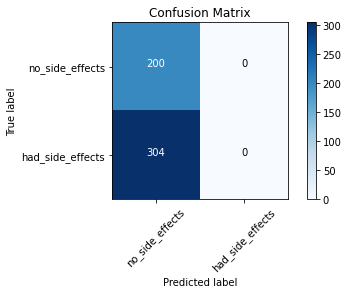

In [60]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')